In [56]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [57]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [58]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [59]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [63]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [64]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [65]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [66]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

## Sepal length vs Sepal Width ( Setosa vs Versicolor)

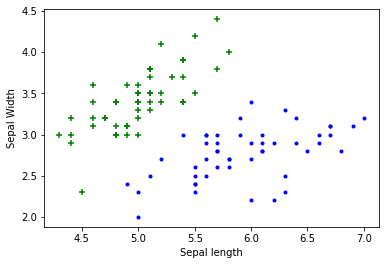

In [68]:
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "green", marker="+")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker=".")

## Petal length vs Petal Width (Setosa vs Versicolor)

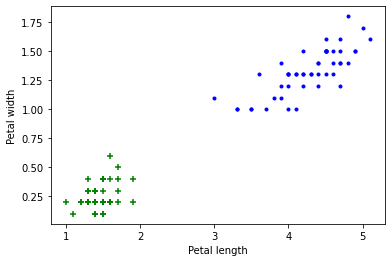

In [69]:
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker="+")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker=".")

## Train using Support Vector Machine (SVM)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = df.drop(['target', 'flower_name'], axis="columns")
y = df.target

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [73]:
len(X_train)

120

In [74]:
len(X_test)

30

In [75]:
from sklearn.svm import SVC
model = SVC()

In [76]:
model.fit(X_train, y_train)

SVC()

In [77]:
model.predict([[4.8, 3.0, 1.5, 0.3]])

array([0])

### Tune Parameters


#### 1. Regularization (C)

In [78]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [79]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

#### 2.Gamma

In [83]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9666666666666667

#### 3.Kernel

In [84]:
model_linear_kernal = SVC(kernel = 'linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [85]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667

### Exercise

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.datasets import load_digits

digits = load_digits()

<Figure size 432x288 with 0 Axes>

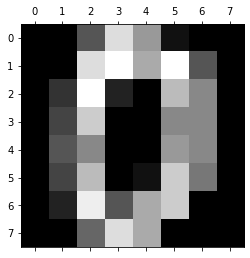

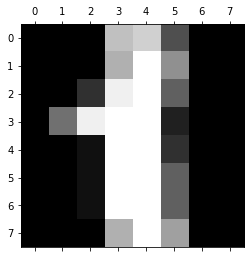

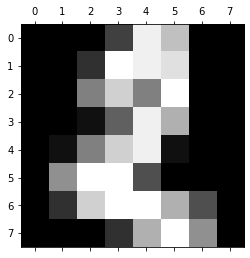

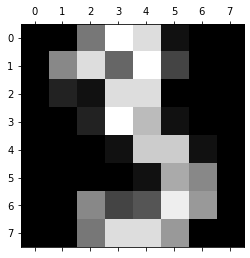

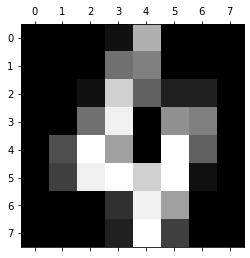

In [106]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

In [107]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [108]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [113]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [114]:
model.fit(X_train, y_train)

SVC()

In [115]:
model.score(X_test, y_test)

0.9861111111111112

#### Tune parameters

#### Regularization (C)

In [136]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9861111111111112

In [138]:
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9916666666666667

#### 2.Gamma

In [139]:
model_g = SVC(gamma = 0.1)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.08888888888888889

#### 3.Kernel

In [140]:
model_linear_kernal = SVC(kernel = "linear")
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

0.9805555555555555

In [141]:
model_rbf_kernal = SVC(kernel = "rbf")
model_rbf_kernal.fit(X_train, y_train)
model_rbf_kernal.score(X_test, y_test)

0.9861111111111112

## confusion matrix

In [145]:
y_predicted = model_C.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 32,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 32]], dtype=int64)

Text(69.0, 0.5, 'Truth')

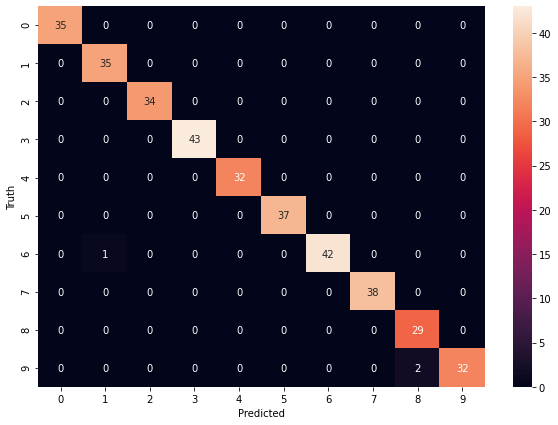

In [148]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel('Truth')